In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
diabete = pd.read_csv('/content/diabetes.csv')

# Preview the first few rows
diabete.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# a. Load the dataset into a Pandas DataFrame (already done above)

# b. Handle missing values, outliers, and encode categorical variables if necessary
# Checking for missing values
print(diabete.isnull().sum())

# c. Normalize or standardize the data if needed
# Example: Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = diabete.iloc[:, :-1]
y = diabete.iloc[:, -1]
X_scaled = scaler.fit_transform(X)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


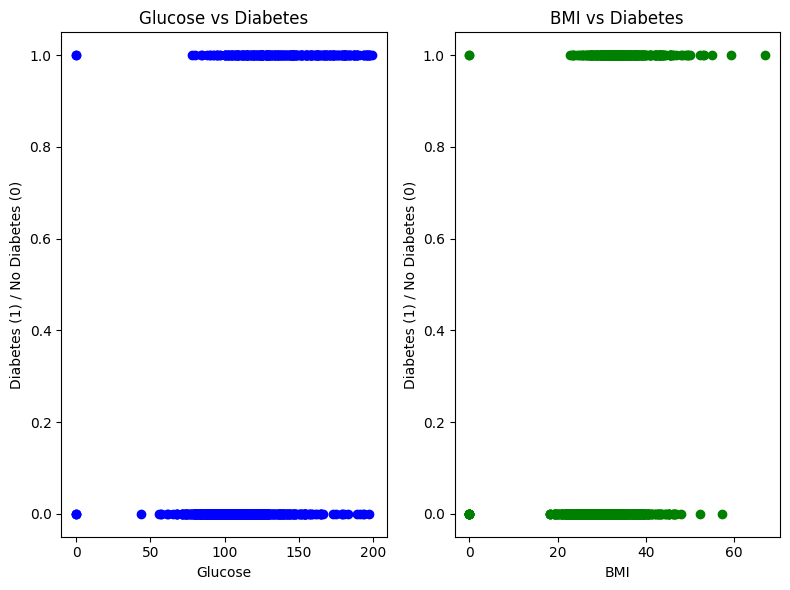

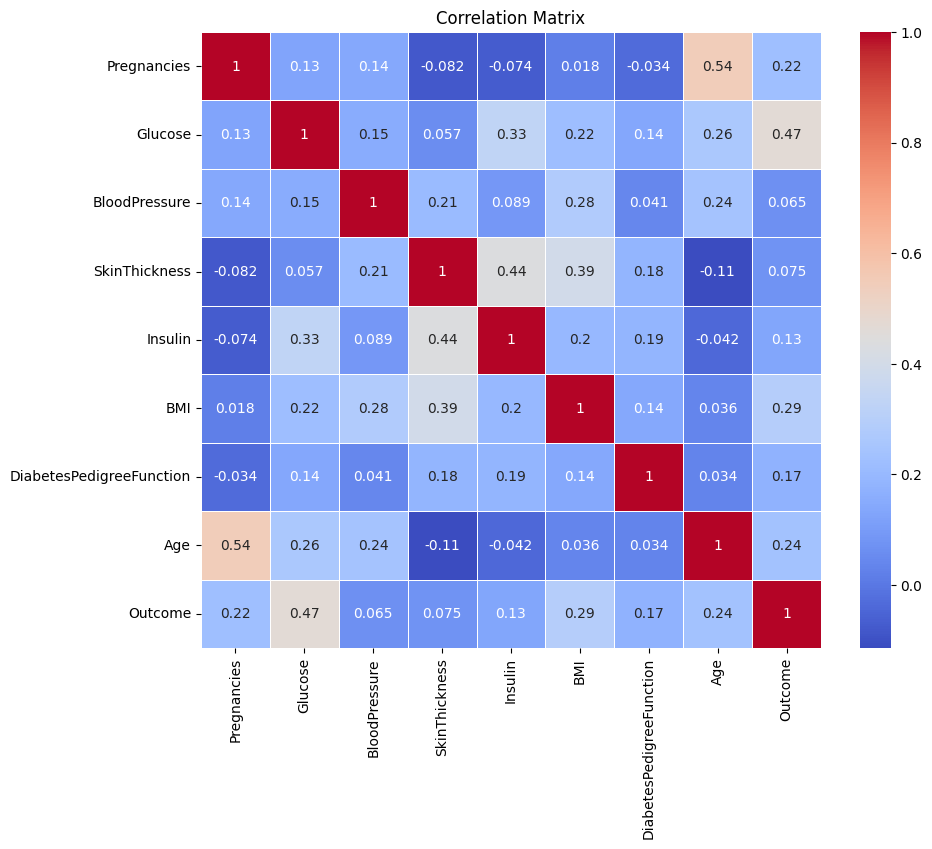

In [11]:
# Visualize relationships between the dependent and independent variables
plt.figure(figsize=(8, 6))

# Scatter plot for the first feature (e.g., Glucose)
plt.subplot(1, 2, 1)
plt.scatter(X['Glucose'], y, color='blue')
plt.xlabel('Glucose')
plt.ylabel('Diabetes (1) / No Diabetes (0)')
plt.title('Glucose vs Diabetes')

# Scatter plot for the second feature (e.g., BMI)
plt.subplot(1, 2, 2)
plt.scatter(X['BMI'], y, color='green')
plt.xlabel('BMI')
plt.ylabel('Diabetes (1) / No Diabetes (0)')
plt.title('BMI vs Diabetes')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(diabete.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Check the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


In [ ]:
# a. Use the Scikit-learn library to fit a logistic regression model
reg = LogisticRegression()

# b. Train the model using the training data
reg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# a. Use the trained model to make predictions on the test data
y_pred = reg.predict(X_test)

# b. Generate a confusion matrix and classification report to assess accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[79 20]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



ROC AUC Score: 0.74


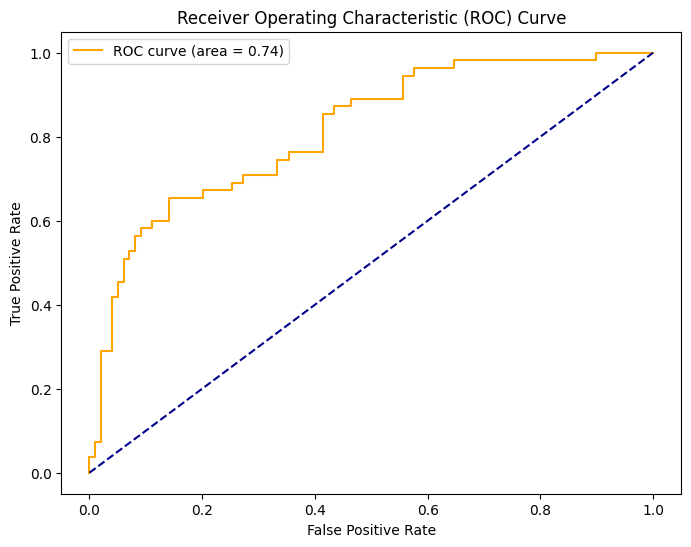

In [ ]:
# Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC curve
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, reg.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
